<h1> Flux Calculator</h1>

## How does it work?

We will be using and comparing two methods for computing flux over a surface. All functions and methods were implemented fully by us.<br>
We will be also  using two fundamental formulas (implied by the definition of surface integral and Divergence Theorem):
$$\Phi = \iint_{S}{\mathbf{F}\cdot\operatorname{d}\!\mathbf{S}}=\iint_{D}{\mathbf{F}\left(\mathbf{r}\left(u, v\right)\right)\cdot \left(\mathbf{r}_u\times\mathbf{r}_v\right)\operatorname{d}\!u\operatorname{d}\!v},$$
$$\Phi = \iint_{S}{\mathbf{F}\cdot\operatorname{d}\!\mathbf{S}}=\iiint_V{\operatorname{div}{\mathbf{F}}\operatorname{d}\!V}.$$


### Simpson's rule

Firstly, we will take a look at the composite Simpson's rule and modify it for solving multiple integrals.<br>

For one dimensional, regular integral we have
$$\int_a^b{f(x)\operatorname{d}\!x}\approx \frac{b-a}{3\,n}\left(f(a)+2\sum_{i=1}^{\frac{n}{2}-1}{f\left(a+2\,i\frac{b-a}{n}\right)}+4\sum_{i=1}^{\frac{n}{2}}{f\left(a+\left(2\,i-1\right)\frac{b-a}{n}\right)}+f(b)\right),$$
where $n -$ number of nodes (split points).<br>
So we will be splitting an interval into smaller pieces and compute values of a function in these points with particular weights to interpolate a function and approximate the value of an integral.<br>
The weights will look like
$$1\;4\;2\;4\;\ldots\;4\;2\;4\;1.$$

### Simpson's rule for multiple integrals

To compute a multiple integral numerically based on standard composite Simpson's rule, we will split a region or a volume into smaller pieces. We will just apply the above method for every dimension and multiply the weights. Later, we assume that number of nodes in every dimension is equal.<br>
For example, the matrix of weights for double integral will look like
$$\begin{bmatrix}
1&4&2&4&\cdots&4&2&4&1\\
4&16&8&16&\cdots&16&8&16&4\\
2&8&4&8&\cdots&8&4&8&2\\
4&16&8&16&\cdots&16&8&16&4\\
\vdots&&&&\vdots&&&&\vdots\\
4&16&8&16&\cdots&16&8&16&4\\
2&8&4&8&\cdots&8&4&8&2\\
4&16&8&16&\cdots&16&8&16&4\\
1&4&2&4&\cdots&4&2&4&1\\
\end{bmatrix}$$

### Monte Carlo method

Monte Carlo integration is based on the Law of Large Numbers and says that the multiple integral can be approximated by 
$$\int_{\Omega}{f(\mathbf{x})\operatorname{d}\!\mathbf{x}}\approx\frac{V}{N}\sum_{i=1}^{N}{f(\mathbf{x_i})},$$
where $\Omega - $ multidimensional region, $N - $ number of points drawed from $\Omega$, $V - $ volume of $\Omega$.

### Variance reduction - stratification

To reduce a variance, we will be using the stratification method.<br>
It is all about separate $\Omega$ into smaller, equal parts, apply Monte Carlo method to each part and compute the sum of them. The new formula is
$$\int_{\Omega}{f(\mathbf{x})\operatorname{d}\!\mathbf{x}}\approx\frac{1}{N}\sum_{j=1}^{P}{\omega_j\sum_{i=1}^{N}{f(\mathbf{x_{ij}})}},$$
where $P -$ number of parts, $\omega_j - $ volume of jth part. 

## Encountered problems

Main problems that we have encountered are
- integration over irregular regions,
- orientation of a surface.

### Integration over irregular regions

For Simpson's rule, we will be stretching a region to a full rectangle (or cuboid) and multiply the edges by normalized lengths (or areas) for particular node.<br><br>
For Monte Carlo method, we will be limiting a region by a rectangle (or cuboid) and for points that are not in the region changing a value $f(\mathbf{x})$ to $0$. 

### Orientation of a surface

There is no such a general method for checking the orientation of a surface, so we will be giving an absolute value of a flux  $\Phi$ &mdash; $\left|\Phi\right|$. 

## Methods comparison and their accuracy

We will compare the two methods using parametrization. We will take for Simpson's rule $2\,n$ nodes for each dimension (number of nodes have to be even) and for Monte Carlo method $100\,n$ points will be drawed from $4\,n$ parts.

We will also compare the calculated values with those that we obtained during our classes.

In [1]:
include("IntegralUtils.jl")
using .IntegralUtils
using Plots
using LaTeXStrings


ns = Int.(round.(LinRange(10, 100, 10)));

## First example:


$$
\vec{F} = \left[2x,5y,0\right],\quad \vec{r}(u, v) = \left[u, v, 4u + 3v\right], \\[2pt] 0 \le u \le 1,\quad -8\le v\le 8.
$$ 

Here the proper answer is $|\Phi| = 64$. 

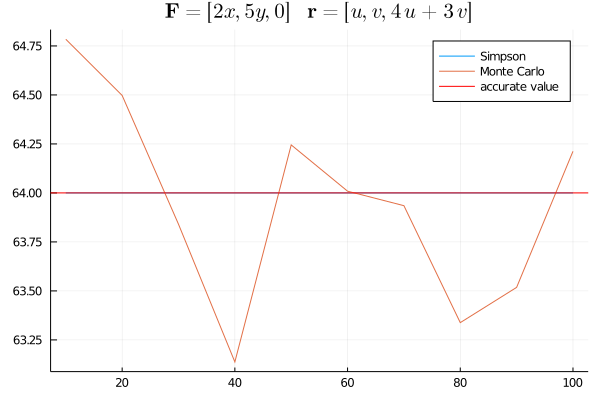

In [3]:
F(x, y, z) = [2x, 5y, 0]
r(u, v) = [u, v, 4u + 3v]
U = (0, 1)
ϕ(u) = -8
ψ(u) = 8
test(n, technique) = Φ(F, r, U, ϕ, ψ; N = n, technique = technique)
simpson = test.(ns, "Simpson")
monte_carlo = test.(ns, "Monte Carlo")

plot(ns, simpson, label = "Simpson", title = L"\mathbf{F}=[2x,5y,0]\quad\mathbf{r}=[u,v,4\,u+3\,v]")
plot!(ns, monte_carlo, label = "Monte Carlo")
hline!([64], color=:red, label="accurate value")

## Second example:


$$
\vec{F} = \left[x^2, \,y^2,\, z^2\right],\quad \vec{r}(u, v) = \left[u, \,v,\, 4-u-v\right], \\[2pt]
0 \le u \le 4, \quad 0 \le v\le 4.
$$

The proper answer is $\left|\Phi\right| = $.

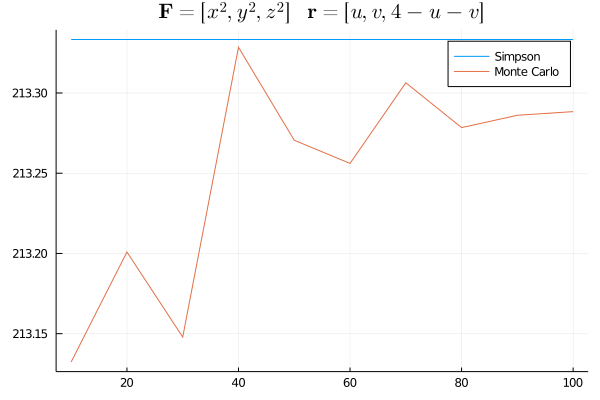

In [3]:
F(x, y, z) = [x^2, y^2, z^2]
r(u, v) = [u, v, 4-u-v]
U = (0, 4)
ϕ(u) = 0
ψ(u) = 4
test(n, technique) = Φ(F, r, U, ϕ, ψ; N = n, technique = technique)
simpson = test.(ns, "Simpson")
monte_carlo = test.(ns, "Monte Carlo")

plot(ns, simpson, label = "Simpson", title = L"\mathbf{F}=[x^2,y^2,z^2]\quad\mathbf{r}=[u,v,4-u-v]")
plot!(ns, monte_carlo, label = "Monte Carlo")

## Third example:

$$
\vec{F} = \left[x-z, y-x, z-y\right],\quad \vec{r}(u, v) = \left[u\cos(v), u\sin(v), u\right], \\[2pt]
0  \le u \le 3,\quad 0\le v\le \pi.
$$

The proper answer is $\left|\Phi\right| = $


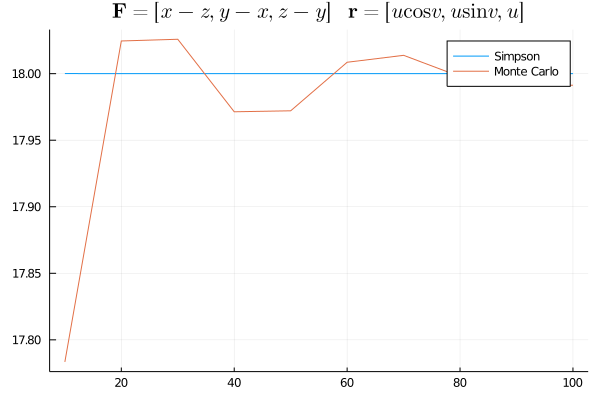

In [4]:
F(x, y, z) = [x-z, y-x, z-y]
r(u, v) = [u * cos(v), u * sin(v), u]
U = (0, 3)
ϕ(u) = 0
ψ(u) = π
test(n, technique) = Φ(F, r, U, ϕ, ψ; N = n, technique = technique)
simpson = test.(ns, "Simpson")
monte_carlo = test.(ns, "Monte Carlo")

plot(ns, simpson, label = "Simpson", title = L"\mathbf{F}=[x-z,y-x,z-y]\quad\mathbf{r}=[u\cos{v},u\sin{v},u]")
plot!(ns, monte_carlo, label = "Monte Carlo")

## Fourth example:


$$
\vec{F} = \left[x, y, z\right],\quad \vec{r}(u, v) = \left[u\cos(v), u\sin(v), u^2\right], \\[2pt]
0  \le u \le 4,\quad -\pi \le v\le \pi.
$$

The proper anser is $\left|\Phi\right| = $

In [ ]:
F(x, y, z) = [x, y, z]
r(u, v) = [u * cos(v), u * sin(v), u^2]
U = (0, 4)
ϕ(u) = -pi
ψ(u) = pi
test(n, technique) = Φ(F, r, U, ϕ, ψ; N = n, technique = technique)
simpson = test.(ns, "Simpson")
monte_carlo = test.(ns, "Monte Carlo")

plot(ns, simpson, label = "Simpson", title = L"\mathbf{F}=[x,y,z]\quad\mathbf{r}=[u\cos{v},u\sin{v},u^2]")
plot!(ns, monte_carlo, label = "Monte Carlo")

## Fifth example:


$$
\vec{F} = \left[\operatorname{tg}(xy), x^2y, -z\right],\quad \vec{r}(u, v) = \left[u, \cos(v), \sin(v)\right], \\[2pt]
1 \le u \le 4,\quad 0\le v\le 2\pi.
$$

The proper anser is $\left|\Phi\right| = $


In [ ]:
F(x, y, z) = [tan(x * y), x^2 * y, -z]
r(u, v) = [u, cos(v), sin(v) / 3]
U = (1, 4)
ϕ(u) = 0
ψ(u) = 2pi
test(n, technique) = Φ(F, r, U, ϕ, ψ; N = n, technique = technique)
simpson = test.(ns, "Simpson")
monte_carlo = test.(ns, "Monte Carlo")

plot(ns, simpson, label = "Simpson", title = L"\mathbf{F}=[\tan{xy},x^2y,-z]\quad\mathbf{r}=[u,cos(v),\frac{1}{3}\sin{v}]")
plot!(ns, monte_carlo, label = "Monte Carlo")

## Sixth example:

$$
\vec{F} = \left[\cosh(y),0, \sinh(x)\right],\quad\vec{r}(u, v) = \left[u, v, u + v^2\right], \\[2pt]
0 \le u \le 1, \quad 0 \le v \le u.
$$

The proper answer is: $\left|\Phi\right| = $.

In [ ]:
F(x, y, z) = [(exp(y)+exp(-y))/2, 0, (exp(x)-exp(-x))/2]
r(u, v) = [u, v, u + v^2]
U = (0, 1)
ϕ(u) = 0
ψ(u) = u
test(n, technique) = Φ(F, r, U, ϕ, ψ; N = n, technique = technique)
simpson = test.(ns, "Simpson")
monte_carlo = test.(ns, "Monte Carlo")

plot(ns, simpson, label = "Simpson", title = L"\mathbf{F}=[\operatorname{cosh}{y},0,\operatorname{sinh}{x}]\quad\mathbf{r}=[u,v,u+v^2]")
plot!(ns, monte_carlo, label = "Monte Carlo")

## Seventh example:


$$
\vec{F} = \left[y^2, x^2, z^4\right],\quad \vec{r}(u, v) = \left[u\sin(v), u\cos(v), u\right], \\[2pt]
0  \le u \le 8,\quad -\frac{\pi}{2}\le v\le \frac{\pi}{2}.
$$

The proper anser is $\left|\Phi\right| = $.


In [ ]:
F(x, y, z) = [y^2, x^2, z^4]
r(u, v) = [u * sin(v), u * cos(v), u]
U = (0, 8)
ϕ(u) = -pi / 2
ψ(u) = pi / 2
test(n, technique) = Φ(F, r, U, ϕ, ψ; N = n, technique = technique)
simpson = test.(ns, "Simpson")
monte_carlo = test.(ns, "Monte Carlo")

plot(ns, simpson, label = "Simpson", title = L"\mathbf{F}=[y^2,x^2,z^4]\quad\mathbf{r}=[u\sin{v},u\cos{v},u]")
plot!(ns, monte_carlo, label = "Monte Carlo")

# Thank You for attention :)